In [2]:
import paramiko
import getpass

host = "158.251.88.197"
port = 22
username = "iaraya"
password = getpass.getpass()

ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect(host, port, username, password)

 ········


## Solving instances

In [1]:
from bsg import load_BRinstance, load_BRKGAinstance
import numpy as np

#L,W,H,boxes,id2box = load_BRinstance(filename="BR8.txt",inst=4, nbox=1)
L,W,H,boxes,id2box = load_BRKGAinstance(filename="../benchs/class1/100.txt",inst=1, nbox=1)
_boxes=boxes.copy()

#Dimension del contenedor
#L = int(L/2)
#W = int(W/2)
#H = int(H/2)

In [3]:
from mclp import generate_candidate_solution
r_param = 1.5 
total_test = 100

#Creacion de solucion candidata
init_solution = generate_candidate_solution(ssh,L,W,H,boxes,id2box, r_param=r_param, bsg_time=1)

Initial Solution: 24


In [48]:
from mclp import get_media_volumen
for bin in init_solution:
    print(bin.id, ":", bin, bin.utilization)
get_media_volumen(init_solution)

1 : [21, 5], [3, 3], [15, 1], [27, 4], [7, 7],  0.8853237
2 : [30, 5], [8, 3], [13, 3], [28, 2],  0.89728888
3 : [30, 3], [15, 2], [8, 3], [18, 3], [11, 9], [5, 1], [1, 4],  0.91810907
4 : [10, 5], [12, 2], [24, 3], [20, 3],  0.86432163
5 : [18, 3], [9, 1], [17, 1], [4, 5], [6, 4], [14, 2],  0.84526517
6 : [17, 2], [25, 3], [19, 4], [20, 3], [29, 1],  0.83804658
7 : [29, 3], [17, 4], [5, 1], [4, 3], [28, 1],  0.73177432
8 : [26, 2], [22, 5], [14, 1], [29, 1], [10, 1], [17, 1], [16, 4],  0.83419068
9 : [9, 1], [29, 1], [23, 4], [28, 2], [2, 6],  0.78249222
10 : [29, 3], [23, 1], [28, 1],  0.39305423


0.7989866476938383

In [49]:
i=6
print(id2box[i].l,id2box[i].w,id2box[i].h)
print(id2box[i].rotx,id2box[i].roty,id2box[i].rotz)

119 59 39
0 1 1


In [50]:
import copy as cp 
from mclp import random_swap
from mclp import verify_solution

best_solution = cp.deepcopy(init_solution)
media = get_media_volumen(init_solution)

for i in range(1000):
    solution = cp.deepcopy(best_solution)
    solution, diff_var = random_swap(solution = solution, media_volumen = media, verbose=True)

    if solution is not None and diff_var>0:
        verified_solution=True
        if not verify_solution(ssh, solution, id2box, bsg_time=2):
            print(i,"verification fails")
            verified_solution=False

        if verified_solution:
            for bin in solution:
                print(bin.id, ":", bin, bin.utilization, bin.verify, bin.p)
            best_solution = cp.deepcopy(solution)

    

Initial 
Bin 1: 0.8853236971337477 
Bin 2: 0.7824922165042207 
Var: 0.0077261523662583865
After Swap
Bin 1: 0.8390367723367606 
Bin 2: 0.8287791413012079 
prob: None 0.7
Varianza Inicial: 0.0077261523662583865. Varianza final: 0.002491605159258764
Initial 
Bin 1: 0.9181090652315791 
Bin 2: 0.8380465832860796 
Var: 0.01571582892850589
Initial 
Bin 1: 0.7824922165042207 
Bin 2: 0.9181090652315791 
Var: 0.01446221662030488
Initial 
Bin 1: 0.8452651738046584 
Bin 2: 0.8643216322338365 
Var: 0.0064103621838316575
After Swap
Bin 1: 0.8559250858591803 
Bin 2: 0.8536617201793146 
prob: 0.3 0.4
Varianza Inicial: 0.0064103621838316575. Varianza final: 0.006231349292000557
Initial 
Bin 1: 0.731774316068773 
Bin 2: 0.39305423304481796 
Var: 0.16929862278526195
After Swap
Bin 1: 0.6504103052414221 
Bin 2: 0.4744182438721688 
prob: None 0.9
Varianza Inicial: 0.16929862278526195. Varianza final: 0.127419578295884
Initial 
Bin 1: 0.39305423304481796 
Bin 2: 0.8380465832860796 
Var: 0.16630680383125424

AttributeError: 'bin' object has no attribute 'p'

### Estimation of adjusted volumes

In [4]:
from mclp import generate_candidate_solution
r_param = 1.5 

## se podría usar greedy para solución inicial
boxes=_boxes.copy()
#Creacion de solucion candidata
bins1 = generate_candidate_solution(ssh,L,W,H,boxes,id2box, r_param=r_param, bsg_time=1)
boxes=_boxes.copy()
bins2 = generate_candidate_solution(ssh,L,W,H,boxes,id2box, r_param=r_param, bsg_time=1)
boxes=_boxes.copy()
bins3 = generate_candidate_solution(ssh,L,W,H,boxes,id2box, r_param=r_param, bsg_time=1)
boxes=_boxes.copy()
bins4 = generate_candidate_solution(ssh,L,W,H,boxes,id2box, r_param=r_param, bsg_time=1)
boxes=_boxes.copy()
bins5 = generate_candidate_solution(ssh,L,W,H,boxes,id2box, r_param=r_param, bsg_time=1)

Initial Solution: 24
Initial Solution: 23
Initial Solution: 25
Initial Solution: 25
Initial Solution: 24


In [8]:
from sklearn.linear_model import LinearRegression

# obtengo conjuntos de bins que se pueden colocar en un bin
bins=[*bins1[:-2],*bins2[:-2],*bins3[:-2],*bins4[:-2],*bins5[:-2]] #40 bins

#10x1 + 5x2 +7x3 = 1
#7x3 + 1x7 = 1
#7x3 + 14x1 = 1 
#...


X = []; y=[]
for bin in bins:
    x = np.zeros(len(_boxes))
    i=0
    for box in _boxes:
        if box in bin.boxes:
            x[i]=bin.boxes[box]
        i+=1
    X.append(x)
    y.append(1.0)

reg = LinearRegression(fit_intercept=False).fit(X, y)
reg.coef_

array([ 0.5185339 ,  0.14429823,  0.17714019,  0.59968121,  0.14499944,
        0.55878379,  0.33470823,  0.3967688 ,  0.02343111,  0.02231986,
       -0.2370235 ,  0.02304035,  0.01450131,  0.17535018,  0.36119221,
        0.03531275,  0.41483298,  0.01756669,  0.1982362 ,  0.61797667,
        0.16428477,  0.06514199,  0.4074887 ,  0.07553366, -0.06482393,
       -0.21946395,  0.26619555,  0.12342805,  0.11700396,  0.60092046,
        0.11709993,  0.29858696,  0.34648922,  0.46081129, -0.17460496,
       -0.16812348,  0.8785457 ,  0.54205989,  0.15206929, -0.03173982,
        0.349554  ,  0.45975045,  0.46375263,  0.20676317,  0.42619902,
        0.51407274,  0.28504364,  0.51909399,  0.03466179,  0.46760113,
        0.36071713,  0.37891625,  0.53672099, -0.05699416,  0.17058518,
       -0.03782645,  0.02334862,  0.03884626,  0.45403729,  0.47463491,
        0.36331378,  0.39247112,  0.028867  ,  0.16562903,  0.06384514,
        0.03365729, -0.06973704,  0.439979  ,  0.15125603,  0.34

In [9]:
vols=[box.vol/(L*W*H) for box in _boxes]

(-0.29280196242482864, 0.9343241557605526)

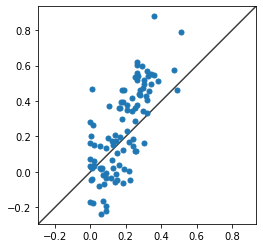

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(vols, reg.coef_, s=25,cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


In [62]:
np.average(np.dot(X,reg.coef_))

0.9993418458767847